In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
%matplotlib inline

In [3]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head(5)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


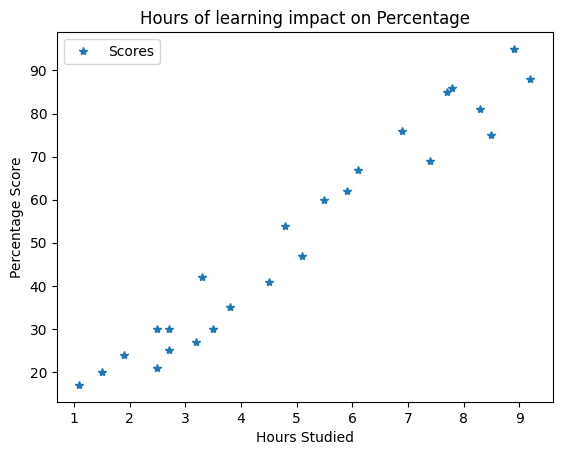

In [5]:
s_data.plot(x='Hours', y='Scores', style='*')
pyplot.title('Hours of learning impact on Percentage')
pyplot.xlabel('Hours Studied')
pyplot.ylabel('Percentage Score')
pyplot.show()

In [6]:
X = s_data.iloc[:, :-1].values
y = s_data.iloc[:, 1].values

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                            test_size=0.2, random_state=0)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete.")

Training complete.


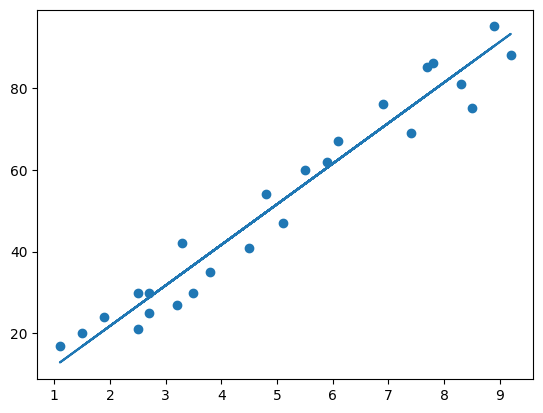

In [9]:
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
pyplot.scatter(X, y)
pyplot.plot(X, line);
pyplot.show()

In [11]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [14]:
import numpy as np
hours = 9.25
own_pred = regressor.predict(np.array([[hours]]))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))


No of Hours = 9.25
Predicted Score = 93.69173248737539


In [15]:
from sklearn import metrics
print('Mean Absolute Error:',
      metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
